### **Procesamiento y análisis de señales de EDA para la práctica de investigación MÉTODOS PSICOFISIOLÓGICOS**

Procesamiento y analisis de señales de actividad electrodermica (EDA) a modo de ejemplo para la realizacion
del trabajo final de la práctica de investigacion Metodos Psicofisiologicos. Se utilizo el paquete
de  analisis de datos fisiologicos NeuroKit2

Referencia del paquete: Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H., Schölzel, C., & Chen, S. A. (2021).
NeuroKit2: A Python toolbox for neurophysiological signal processing. Behavior Research Methods.
https://doi.org/10.3758/s13428-020-01516-y


In [ ]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

In [ ]:
# Simulacion de 10 segundos de señal de EDA a 250hz con 3 scr peaks
eda_signal = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=3, drift=0.01)

# Procesamiento
signals, info = nk.eda_process(eda_signal, sampling_rate=250)
signals


,EDA_Raw,EDA_Clean,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.993467,0.994206,1.163010,-0.196387,0,0,0.0,0.0,0.0,0,0.0
1,0.993546,0.994515,1.163182,-0.196278,0,0,0.0,0.0,0.0,0,0.0
2,0.993696,0.994822,1.163354,-0.196170,0,0,0.0,0.0,0.0,0,0.0
3,0.993913,0.995128,1.163526,-0.196065,0,0,0.0,0.0,0.0,0,0.0
4,0.994191,0.995430,1.163699,-0.195962,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2495,1.244683,1.249442,1.380946,-0.003827,0,0,0.0,0.0,0.0,0,0.0
2496,1.244342,1.249426,1.380946,-0.003534,0,0,0.0,0.0,0.0,0,0.0
2497,1.243995,1.249413,1.380946,-0.003237,0,0,0.0,0.0,0.0,0,0.0
2498,1.243642,1.249401,1.380946,-0.002937,0,0,0.0,0.0,0.0,0,0.0


In [ ]:
# Extract clean EDA and SCR features
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]


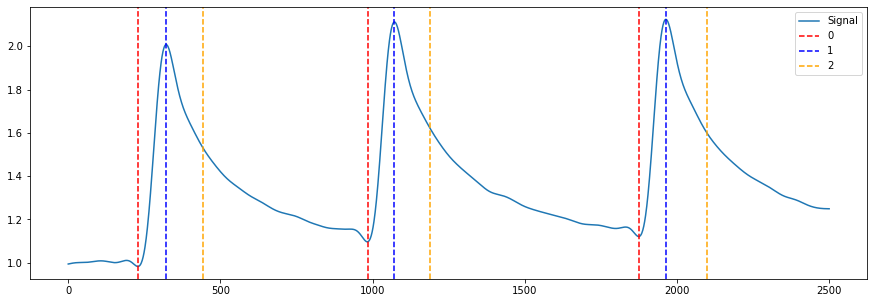

In [ ]:
# Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

<AxesSubplot:>

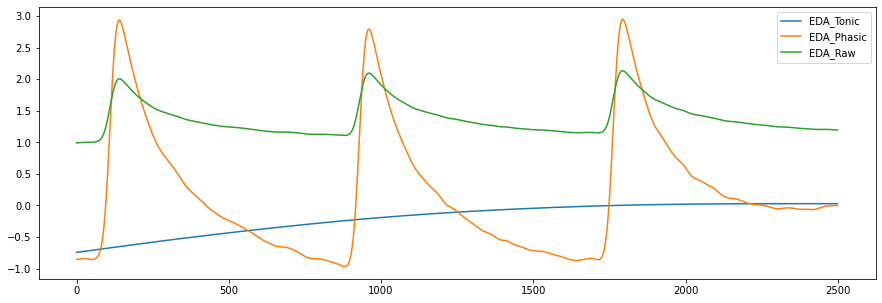

In [ ]:
# Filter phasic and tonic components
data = nk.eda_phasic(nk.standardize(eda_signal), sampling_rate=250)
data["EDA_Raw"] = eda_signal  # Add raw signal
data.plot()

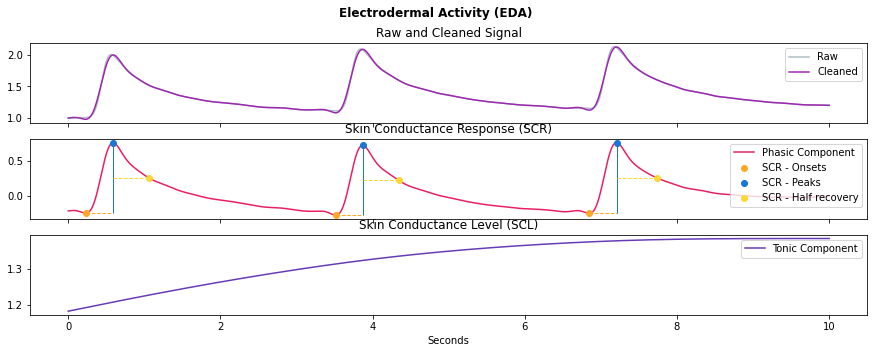

In [ ]:
# Visualise the processing
a = nk.eda_plot(signals, sampling_rate=250)


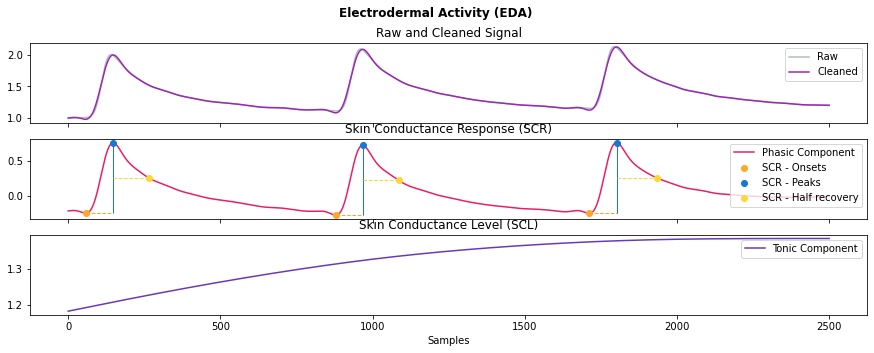

In [ ]:
# Plot EDA signal
plot1 = nk.eda_plot(signals)

In [ ]:
results = nk.eda_analyze(signals, sampling_rate=250)

In [ ]:
results

,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean
0,3.0,1.007107


In [ ]:
r = nk.eda_peaks(data, sampling_rate=20, method="neurokit", amplitude_min=0.1)

ValueError: NumPy boolean array indexing assignment cannot assign 6 input values to the 3 output values where the mask is true

In [ ]:
# Descomposición de señal usando el algoritmo de cvxEDA (Greco et. al, 2016)
eda_signal = nk.eda_simulate(duration=30, scr_number=5, drift=0.1)
# Decompose using different algorithms
cvxEDA = nk.eda_phasic(nk.standardize(eda_signal), method='cvxeda')

In [ ]:
cvxEDA


,EDA_Tonic,EDA_Phasic
0,-2.462695,0.000000
1,-2.463854,0.000000
2,-2.465012,0.474096
3,-2.466171,0.476244
4,-2.467329,0.478388
...,...,...
29995,-2.005747,3.472198
29996,-2.005786,3.471751
29997,-2.005825,3.471302
29998,-2.005864,3.470852


<AxesSubplot:>

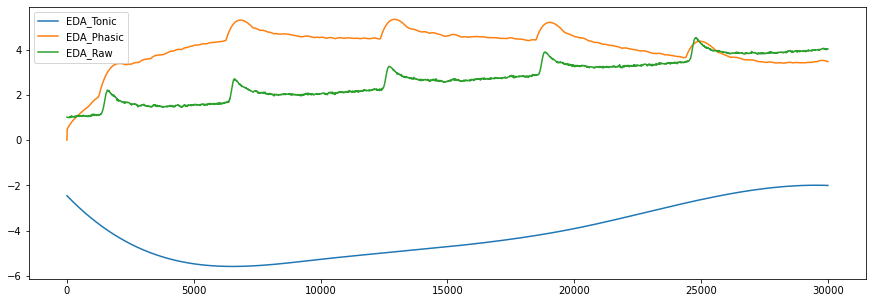

In [ ]:
cvxEDA["EDA_Raw"] = eda_signal  # Add raw signal
cvxEDA.plot()